How have inflation, unemployment, and regional GDP growth influenced Pokémon game sales over time?

How does development time, or gaps between game releases influence sales performance?

Do remake releases (e.g. FireRed & LeafGreen) follow sales patterns similar to their originals, and how do modern market conditions or nostalgia affect performance?

How does sales performance compare between Mainline RPG titles, and Spin-offs?

What effect do external promotions (i.e. movie releases, TV shows) have on game sales?

Is there a measurable relationship between perceived quality decline and total units sold over time?

Can we accurately forecast sales of upcoming Pokemon games: Legends Z-A, and Codename: Gaia using historical sales data and economic factors? 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [3]:
pkmn = pd.read_csv('../data/pokemon_games.csv')
pkmn.columns

Index(['title', 'category', 'console', 'publisher', 'release_year',
       'abbr_title', 'game_url', 'game_id', 'release_date', 'last_update',
       'japan_sales', 'na_sales', 'europe_sales', 'others_sales',
       'total_units', 'total_shipped', 'meta_score', 'user_review',
       'near_movie_release'],
      dtype='object')

In [4]:
# recast for visuals later
pkmn['release_date'] = pd.to_datetime(pkmn['release_date'])
pkmn['release_year'] = pkmn['release_year'].astype('int')
pkmn['meta_score'] = pd.to_numeric(pkmn['meta_score'], errors='coerce')
pkmn['user_review'] = pd.to_numeric(pkmn['user_review'], errors='coerce')

In [5]:
# grouping columns 
core_game_info = ['title', 'category', 'console', 'publisher', 'release_year', 'abbr_title', 'game_url', 'game_id']

date_info = ['release_date', 'last_update']

sales_data = ['japan_sales', 'na_sales', 'europe_sales', 'others_sales', 'total_units', 'total_shipped']

review_data = ['meta_score', 'user_review']

In [6]:
# creating specific dataframes for easier visuals
sorted_sales = pkmn.sort_values('total_units', ascending=False)
top_game_sales = pkmn.sort_values('total_units', ascending=False).head(10)
sales_by_year = (pkmn.groupby('release_year')['total_units'].sum().sort_index())
pkmn_chron_sorted = pkmn.sort_values('release_date')

In [7]:
# categorized sales variables
core_rpg_sales = sorted_sales[sorted_sales['category'] == 'CORE_RPG']
core_upgrade_sales = sorted_sales[sorted_sales['category'] == 'CORE_UPGRADE']
remake_sales = sorted_sales[sorted_sales['category'] == 'REMAKE']
spin_off_sales = sorted_sales[sorted_sales['category'] == 'SPIN_OFF']

sales_by_console = pkmn.groupby('console')['total_units'].sum().sort_values(ascending=False)
sales_by_cat = pkmn.groupby('category')['total_units'].sum().sort_values(ascending=False)

main_srs_sales = pd.concat([core_rpg_sales, core_upgrade_sales, remake_sales])
main_srs_sales = main_srs_sales.sort_values('release_year')

In [8]:
# Metacritic launched in 2001, making the first pokemon entries with reviews Ruby/Sapphire, so I need to drop the games where there aren't reviews 
missing_scores = pkmn[pkmn['meta_score'].isna() | pkmn['user_review'].isna()]
has_reviews = pkmn.dropna(subset=['meta_score', 'user_review'])
# categorized review variables
avg_reviews_by_cat = has_reviews.groupby('category')[['meta_score', 'user_review']].mean()
rvw_by_yr = has_reviews.sort_values('release_year')

In [9]:
# combine core_rpg & core_upgrade to see 'main series' games
main_srs_rvw = pd.concat([core_rpg_sales, core_upgrade_sales, remake_sales])
main_srs_rvw = main_srs_rvw[main_srs_rvw['release_year'] >= 2003]
main_srs_rvw = main_srs_rvw.dropna(subset=['meta_score', 'user_review'])
main_srs_rvw = main_srs_rvw.sort_values('release_year')

In [10]:
# seperated cateogories for analysis
core_rpg = pkmn[pkmn['category'] == 'CORE_RPG'].sort_values('release_date').copy()
remake = pkmn[pkmn['category'] == 'REMAKE'].sort_values('release_date').copy()
core_upgrade = pkmn[pkmn['category'] == 'CORE_UPGRADE'].sort_values('release_date').copy()
spin_off = pkmn[pkmn['category'] == 'SPIN_OFF'].sort_values('release_date').copy()

In [11]:
# analyzing release window in relation to other projects
pkmn['release_gap_days'] = pkmn['release_date'].diff()
pkmn['release_gap_years'] = pkmn['release_gap_days'].dt.days / 365
pkmn.to_csv('pokemon_games.csv', index=False)

# main series only
main_srs_sales['release_gap_days'] = main_srs_sales['release_date'].diff()
main_srs_sales['release_gap_years'] = main_srs_sales['release_gap_days'].dt.days / 365

# core rpg only
core_rpg['release_gap_days'] = core_rpg['release_date'].diff()
core_rpg['release_gap_years'] = core_rpg['release_gap_days'].dt.days / 365

In [12]:
review_sales = pkmn.dropna(subset=['total_units', 'meta_score', 'user_review'])

In [13]:
correlation_meta = review_sales['total_units'].corr(review_sales['meta_score'])
correlation_user = review_sales['total_units'].corr(review_sales['user_review'])

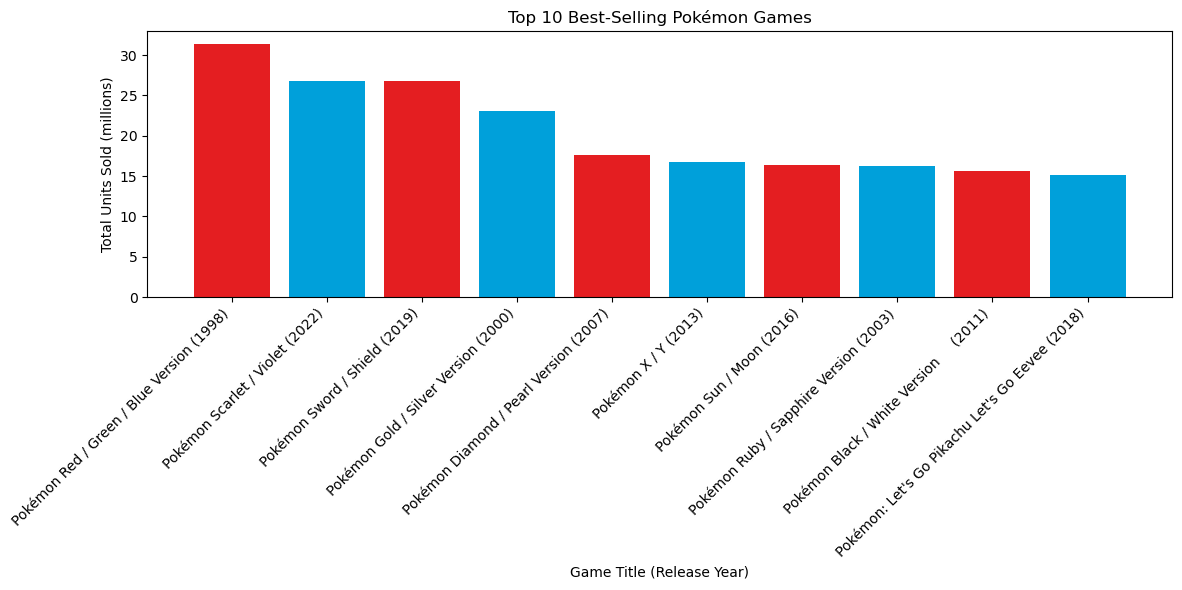

In [14]:
plt.figure(figsize=(12,6))

colors = ['#E41E21', '#00A0DA']
combined_labels = [f"{title} ({year})" for title, year in zip(top_game_sales['title'], top_game_sales['release_year'])]

plt.bar(top_game_sales['title'], top_game_sales['total_units'], color=colors)
plt.xticks(ticks=top_game_sales['title'], labels=combined_labels, rotation=45, ha='right')
plt.xlabel('Game Title (Release Year)')
plt.ylabel('Total Units Sold (millions)')
plt.title('Top 10 Best-Selling Pokémon Games')
plt.tight_layout()
plt.savefig('Top 10 Pokémon Games.png', transparent=True, bbox_inches='tight')
plt.show()

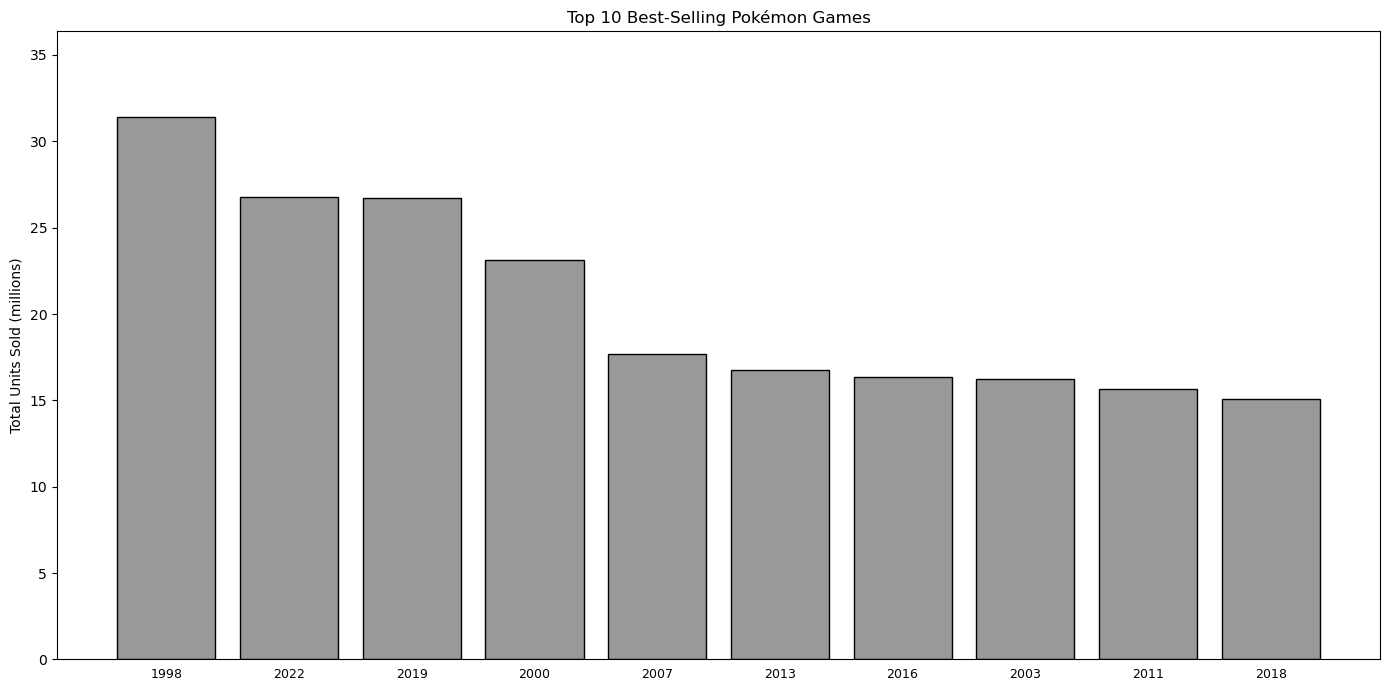

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Basic bar chart
bars = plt.bar(top_game_sales['title'], top_game_sales['total_units'], color='#999999', edgecolor='black')

# Remove x-axis labels (you’ll add box arts manually)
plt.xticks([])  # or plt.xticks([], [])

# Add vertical space above bars for your image editor work
plt.ylim(0, top_game_sales['total_units'].max() + 5)

# Optional: Add a faint guide or label below each bar
for bar, (title, year) in zip(bars, zip(top_game_sales['title'], top_game_sales['release_year'])):
    plt.text(bar.get_x() + bar.get_width() / 2, -0.5, f"{year}", ha='center', va='top', fontsize=9)

# Labels and title
plt.ylabel('Total Units Sold (millions)')
plt.title('Top 10 Best-Selling Pokémon Games')
plt.tight_layout()

# Save as transparent PNG so you can easily overlay box art later
plt.savefig('Top 10 Pokémon Games (blank for box art).png', transparent=True, bbox_inches='tight')
plt.show()

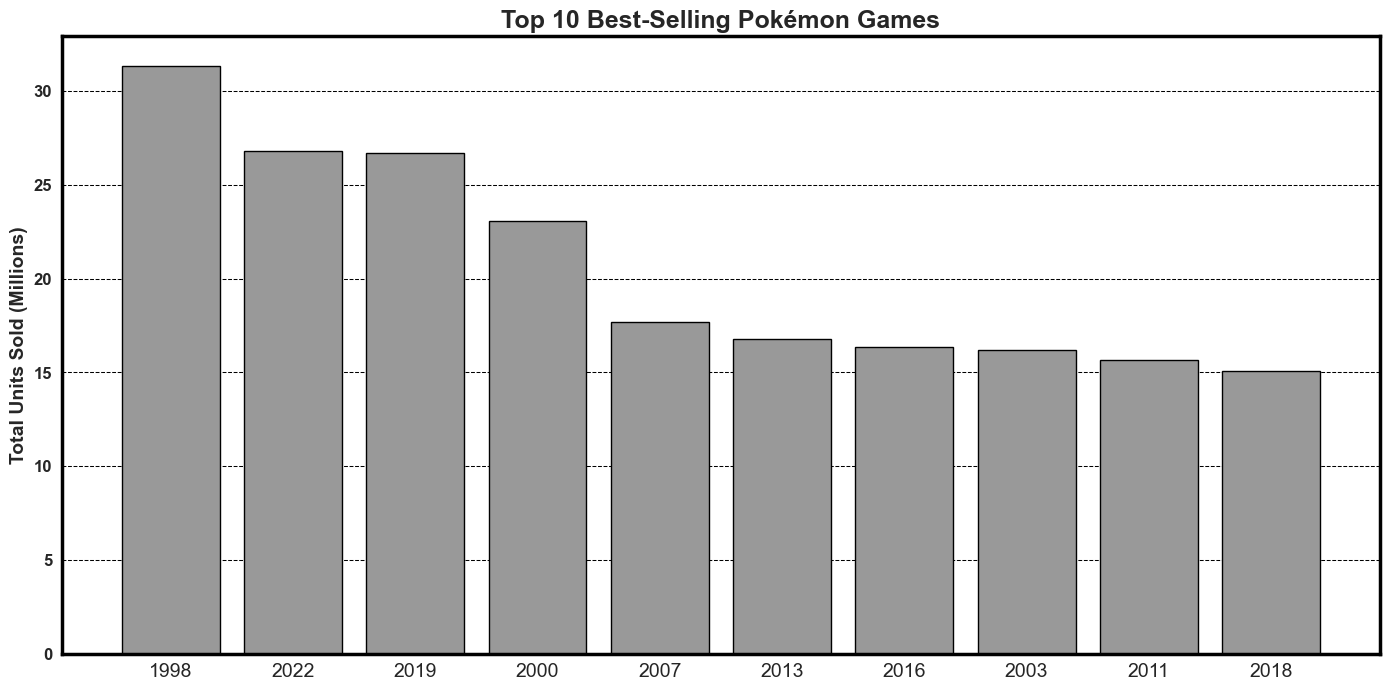

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

bars = plt.bar(top_game_sales['title'], top_game_sales['total_units'], color='#999999', edgecolor='black')

# Remove default x-axis labels (for manual image editing)
plt.xticks([])

# Optional: Small label for year underneath each bar (you can increase fontsize here too)
for bar, (title, year) in zip(bars, zip(top_game_sales['title'], top_game_sales['release_year'])):
    plt.text(bar.get_x() + bar.get_width() / 2, -0.5, f"{year}", 
             ha='center', va='top', fontsize=14)  # 👈 control x-label substitute font size

# Increase y-axis label font size
plt.ylabel('Total Units Sold (Millions)', fontsize=14, fontweight='bold')

# Increase y-axis tick label size
plt.yticks(fontsize=12, fontweight='bold')

# Increase title font size
plt.title('Top 10 Best-Selling Pokémon Games', fontsize=18, fontweight='bold')

plt.grid(axis='y', color='black', linestyle='--', linewidth=0.75)

# Thicker black borders around the plot
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(2.5)

# Add padding and save
plt.tight_layout()
plt.savefig('Top 10 Pokémon Games (with large fonts).png', transparent=True, bbox_inches='tight')
plt.show()

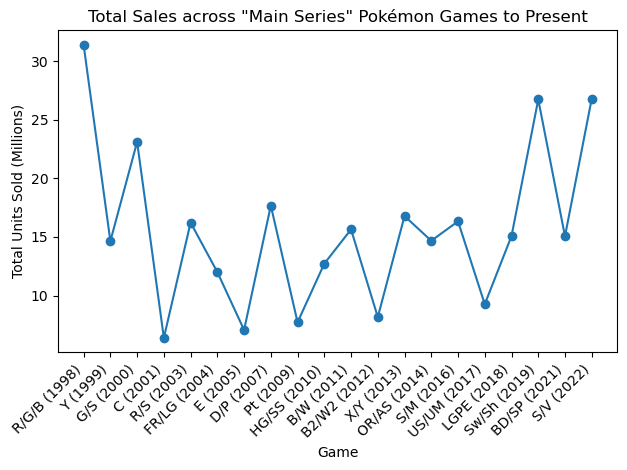

In [16]:
main_srs_labels = [f"{title} ({year})" for title, year in zip(main_srs_sales['abbr_title'], main_srs_sales['release_year'])]


# Main series sales only
plt.plot(main_srs_sales['abbr_title'], main_srs_sales['total_units'], marker='o')
plt.xticks(ticks=main_srs_sales['abbr_title'], labels=main_srs_labels, rotation=45, ha='right')
plt.title('Total Sales across "Main Series" Pokémon Games to Present')
plt.xlabel('Game')
plt.ylabel('Total Units Sold (Millions)')
plt.tight_layout()
plt.savefig('Main Series Games Line.png', transparent=True, bbox_inches='tight')
plt.show()

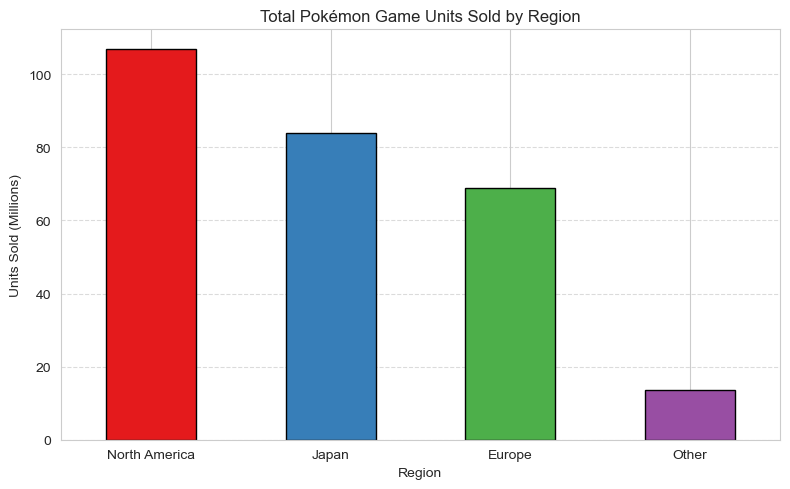

In [17]:
# Relevant regional sales only
region_cols = ['japan_sales', 'na_sales', 'europe_sales', 'others_sales']
region_totals = pkmn[region_cols].sum().sort_values(ascending=False)

region_bars = ['North America', 'Japan', 'Europe', 'Other']

# Set style
sns.set_style("whitegrid")

# Plot
plt.figure(figsize=(8, 5))
ax = region_totals.plot(
    kind='bar',
    color=sns.color_palette('Set1'),
    edgecolor='black')

ax.set_xticklabels(region_bars)

plt.title('Total Pokémon Game Units Sold by Region')
plt.ylabel('Units Sold (Millions)')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Total Pokémon Game Units Sold by Region.png', transparent=True, bbox_inches='tight')
plt.show()

How does development time, or gaps between game releases influence launch sales performance?

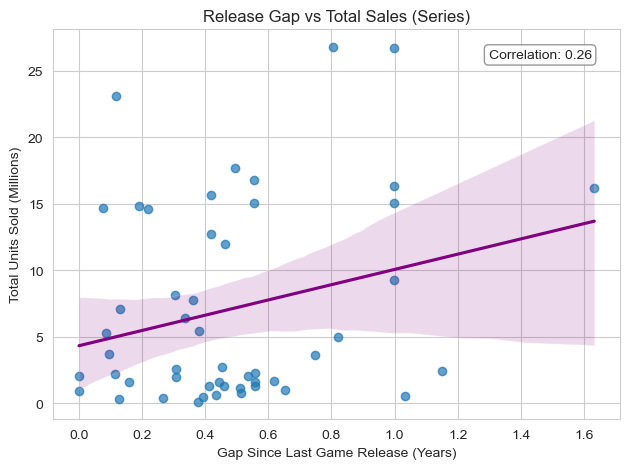

In [18]:
gap_corr = pkmn['release_gap_years'].corr(pkmn['total_units'])

sns.regplot(
    data=pkmn,
    x='release_gap_years',
    y='total_units',
    scatter_kws={'alpha': 0.7},
    line_kws={'color': 'purple'})

# correlation box
plt.text(
    0.95, 0.95, 
    f'Correlation: {gap_corr:.2f}',
    transform=plt.gca().transAxes,  # Use axes coordinates
    ha='right', va='top', 
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
    
plt.title('Release Gap vs Total Sales (Series)')
plt.xlabel('Gap Since Last Game Release (Years)')
plt.ylabel('Total Units Sold (Millions)')
plt.tight_layout()
plt.savefig('Release Gap vs Total Sales (series).png', transparent=True, bbox_inches='tight')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


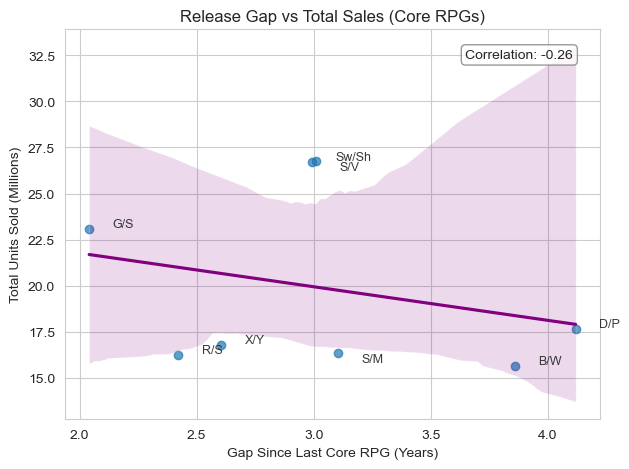

In [19]:
gap_corr = core_rpg['release_gap_years'].corr(core_rpg['total_units'])

sns.regplot(
    data=core_rpg,
    x='release_gap_years',
    y='total_units',
    scatter_kws={'alpha': 0.7},
    line_kws={'color': 'purple'})

# Add labels with alternating y-offsets to prevent overlaps
for i, row in core_rpg.iterrows():
    y_offset = -0.5 if i % 2 == 0 else 0.1  # Alternate up/down
    plt.text(
        row['release_gap_years'] + 0.1,
        row['total_units'] + y_offset,
        row['abbr_title'],
        fontsize=9,
        alpha=0.9)

# correlation box
plt.text(
    0.95, 0.95, 
    f'Correlation: {gap_corr:.2f}',
    transform=plt.gca().transAxes,  # Use axes coordinates
    ha='right', va='top', 
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
    
plt.title('Release Gap vs Total Sales (Core RPGs)')
plt.xlabel('Gap Since Last Core RPG (Years)')
plt.ylabel('Total Units Sold (Millions)')
plt.tight_layout()
plt.savefig('Release Gap vs Total Sales (Core RPGs).png', transparent=True, bbox_inches='tight')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


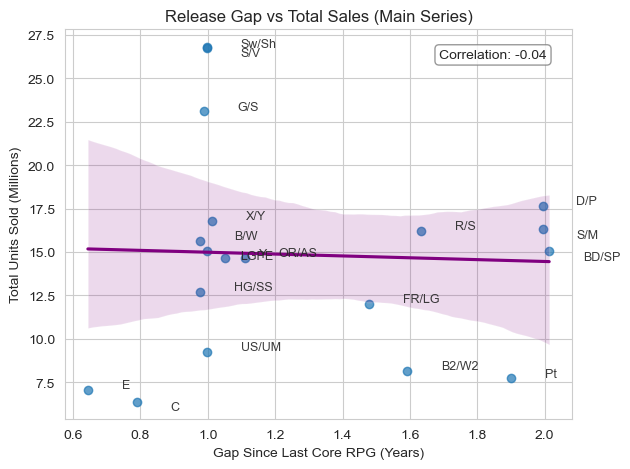

In [20]:
main_gap_corr = main_srs_sales['release_gap_years'].corr(main_srs_sales['total_units'])

sns.regplot(
    data=main_srs_sales,
    x='release_gap_years',
    y='total_units',
    scatter_kws={'alpha': 0.7},
    line_kws={'color': 'purple'})

# Add labels with alternating y-offsets to prevent overlaps
for i, row in main_srs_sales.iterrows():
    y_offset = -0.5 if i % 2 == 0 else 0.1  # Alternate up/down
    plt.text(
        row['release_gap_years'] + 0.1,
        row['total_units'] + y_offset,
        row['abbr_title'],
        fontsize=9,
        alpha=0.9)

# correlation box
plt.text(
    0.95, 0.95, 
    f'Correlation: {main_gap_corr:.2f}',
    transform=plt.gca().transAxes,  # Use axes coordinates
    ha='right', va='top', 
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
    
plt.title('Release Gap vs Total Sales (Main Series)')
plt.xlabel('Gap Since Last Core RPG (Years)')
plt.ylabel('Total Units Sold (Millions)')
plt.tight_layout()
plt.savefig('Release Gap vs Total Sales (Main Series).png', transparent=True, bbox_inches='tight')
plt.show()

When plotting the gaps, I received the error: 
"posx and posy should be finite values ||
posx and posy should be finite values"
Using the below, I was able to determine this error is caused by the RGB, the first games in the series. Being the first, they wouldnt have any measurable gap.

In [21]:
#check for figuring out the error message
nonfinite = core_rpg[~np.isfinite(core_rpg['release_gap_years']) | ~np.isfinite(core_rpg['total_units'])]
print(nonfinite[['abbr_title', 'release_gap_years', 'total_units']])

  abbr_title  release_gap_years  total_units
0      R/G/B                NaN        31.37


In [22]:
# # define release windows
# core_rpg['release_start'] = core_rpg['release_date'].shift()
# core_rpg['release_end'] = core_rpg['release_date']

Do remake releases (e.g. FireRed & LeafGreen) follow sales patterns similar to their originals, and how do modern market conditions or console sales affect performance?

In [23]:
remake_mapping = {
    'FireRed LeafGreen': 'Red Green Blue',
    'HeartGold SoulSilver': 'Gold Silver',
    'OmegaRuby AlphaSapphire': 'Ruby Sapphire',
    'BrilliantDiamond ShiningPearl': 'Diamond Pearl'}

# Convert to DataFrame
remake_comparison = pd.DataFrame([
    {'abbr_title_remake': remake, 'original_title': original}
    for remake, original in remake_mapping.items()])

Is there a measurable relationship between perceived quality decline and total units sold over time?

Metacritic aggreagates critic reviews from multiple sources, and has user submitted reviews as well. The meta score is out of 100. but the user scores are out of 10, so user reviews have been scaled by a factor of 10 to properly compare between them.

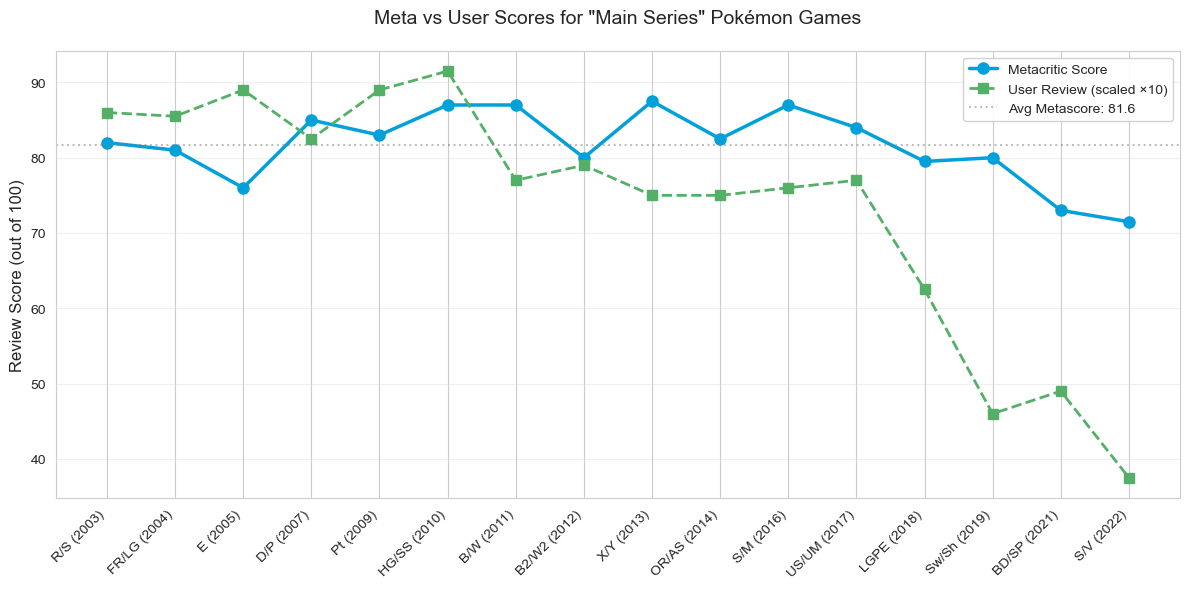

In [24]:
# Calculate correlation between critic & user reviews
rvw_corr = review_sales['user_review'].corr(review_sales['meta_score'])

main_rvw_labels = [f"{title} ({year})" for title, year in zip(main_srs_rvw['abbr_title'], main_srs_rvw['release_year'])]


# Create the plot
plt.figure(figsize=(12, 6), dpi=100)

# Plot lines with distinct styles
critic_line, = plt.plot(main_srs_rvw['abbr_title'], 
                       main_srs_rvw['meta_score'], 
                       color='#00A0DA', 
                       marker='o', 
                       markersize=8,
                       linewidth=2.5,
                       label='Metacritic Score')

user_line, = plt.plot(main_srs_rvw['abbr_title'], 
                     main_srs_rvw['user_review'] * 10, 
                     color='#54AF67',
                     marker='s',  # Square markers
                     markersize=7,
                     linestyle='--',
                     linewidth=2,
                     label='User Review (scaled ×10)')

# Add reference line at average score
mean_score = main_srs_rvw['meta_score'].mean()
plt.axhline(y=mean_score, 
            color='gray', 
            linestyle=':', 
            alpha=0.5,
            label=f'Avg Metascore: {mean_score:.1f}')

# Formatting
plt.xticks(ticks=main_srs_rvw['abbr_title'], labels=main_rvw_labels, rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Review Score (out of 100)', fontsize=12)
plt.title('Meta vs User Scores for "Main Series" Pokémon Games', pad=20, fontsize=14)
plt.grid(axis='y', alpha=0.3)

# Improved legend
plt.legend(framealpha=0.9, 
           loc='upper right',
           fontsize=10)

plt.tight_layout()
plt.savefig('Meta_vs_User_Scores_Pokemon.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

In [25]:
correlation_meta = review_sales['total_units'].corr(review_sales['meta_score'])
correlation_user = review_sales['total_units'].corr(review_sales['user_review'])

print(f"Correlation with Meta Score: {correlation_meta:.2f}")
print(f"Correlation with User Review: {correlation_user:.2f}")

Correlation with Meta Score: 0.57
Correlation with User Review: -0.32


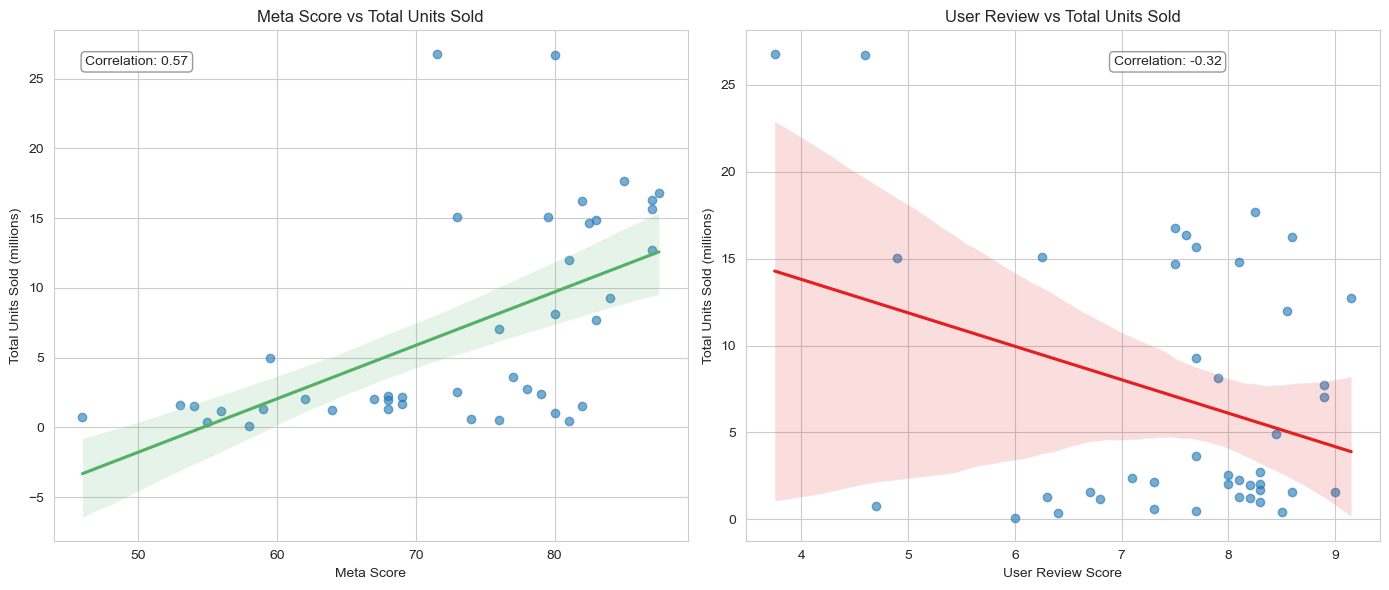

In [26]:
# with regression line
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Meta Score vs Total Units Sold
sns.regplot(
    data=has_reviews,
    x='meta_score',
    y='total_units',
    ax=axes[0],
    scatter_kws={'alpha': 0.6},
    line_kws={'color': '#54AF67'})

axes[0].set_title('Meta Score vs Total Units Sold')
axes[0].set_xlabel('Meta Score')
axes[0].set_ylabel('Total Units Sold (millions)')
axes[0].text(
    0.05, 0.95,
    f'Correlation: {correlation_meta:.2f}',
    transform=axes[0].transAxes,
    ha='left', va='top',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))

# User Review vs Total Units Sold
sns.regplot(
    data=has_reviews,
    x='user_review',
    y='total_units',
    ax=axes[1],
    scatter_kws={'alpha': 0.6},
    line_kws={'color': '#E41E21'})

plt.text(
    0.75, 0.95, 
    f'Correlation: {correlation_user:.2f}',
    transform=plt.gca().transAxes,
    ha='right', va='top', 
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))

axes[1].set_title('User Review vs Total Units Sold')
axes[1].set_xlabel('User Review Score')
axes[1].set_ylabel('Total Units Sold (millions)')


plt.tight_layout()
plt.savefig('Sales_vs_Meta_&_User_Scores.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

In [27]:
# Calculate Interquartile range for all columns and remove outliers
outlier_cols = ['meta_score', 'user_review', 'total_units']

# Create a copy of the original data to avoid modifying the original data
filtered_reviews = has_reviews.copy()

# Loop through each column to filter out outliers
for col in outlier_cols:
    Q1 = filtered_reviews[col].quantile(0.25)
    Q3 = filtered_reviews[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_reviews = filtered_reviews[(filtered_reviews[col] >= lower_bound) & (filtered_reviews[col] <= upper_bound)]

corr_with_outliers = has_reviews['meta_score'].corr(has_reviews['total_units'])
corr_no_outliers = filtered_reviews['meta_score'].corr(filtered_reviews['total_units'])

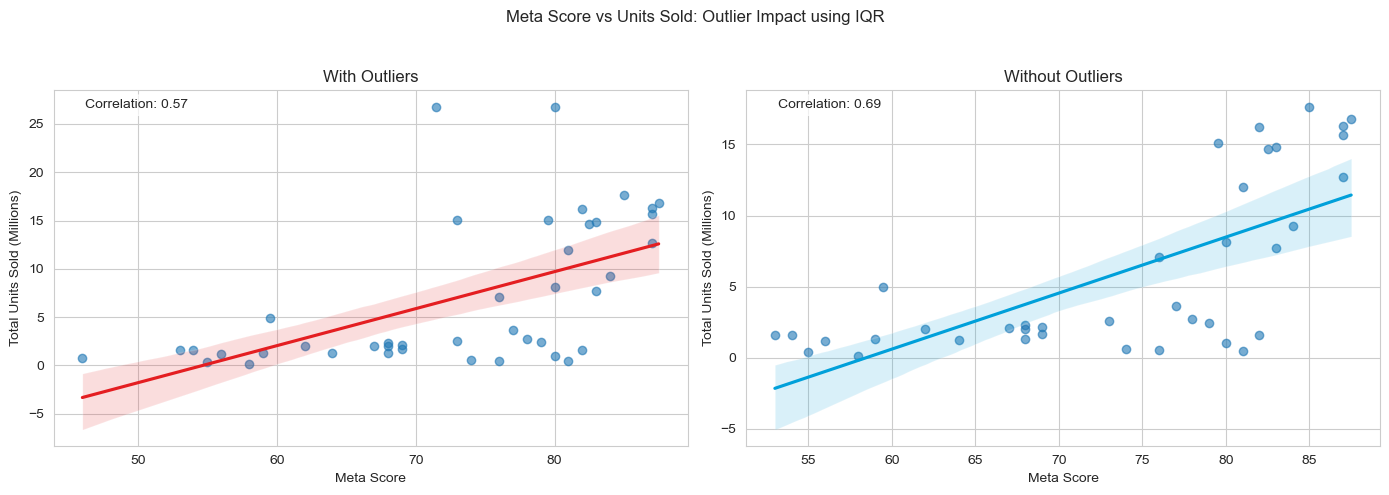

In [28]:
plt.figure(figsize=(14, 5))

# With outliers
plt.subplot(1, 2, 1)
sns.regplot(
    data=has_reviews,
    x='meta_score',
    y='total_units',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': '#E41E21'}
)
plt.title('With Outliers')
plt.xlabel('Meta Score')
plt.ylabel('Total Units Sold (Millions)')
plt.text(0.05, 0.95,
         f'Correlation: {corr_with_outliers:.2f}',
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.7, boxstyle='round'))

# Without outliers
plt.subplot(1, 2, 2)
sns.regplot(
    data=filtered_reviews,
    x='meta_score',
    y='total_units',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': '#00A0DA'}
)
plt.title('Without Outliers')
plt.xlabel('Meta Score')
plt.ylabel('Total Units Sold (Millions)')
plt.text(0.05, 0.95,
         f'Correlation: {corr_no_outliers:.2f}',
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.7, boxstyle='round'))

# Super title
plt.suptitle('Meta Score vs Units Sold: Outlier Impact using IQR')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('Sales_vs_Metacritic_IQR.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

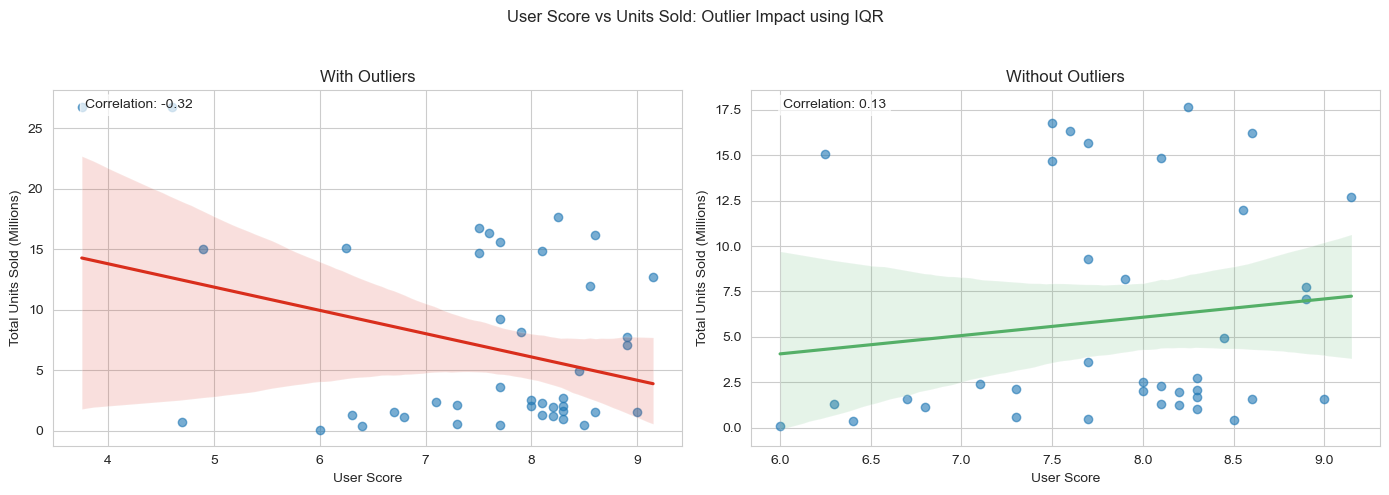

In [29]:
# Calculate correlation coefficients
corr_user_with_outliers = has_reviews['user_review'].corr(has_reviews['total_units'])
corr_user_no_outliers = filtered_reviews['user_review'].corr(filtered_reviews['total_units'])

# Plot
plt.figure(figsize=(14, 5))

# With outliers
plt.subplot(1, 2, 1)
sns.regplot(
    data=has_reviews,
    x='user_review',
    y='total_units',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': '#d92e1c'}
)
plt.title('With Outliers')
plt.xlabel('User Score')
plt.ylabel('Total Units Sold (Millions)')
plt.text(0.05, 0.95,
         f'Correlation: {corr_user_with_outliers:.2f}',
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.7, boxstyle='round'))

# Without outliers
plt.subplot(1, 2, 2)
sns.regplot(
    data=filtered_reviews,
    x='user_review',
    y='total_units',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': '#54AF67'}
)
plt.title('Without Outliers')
plt.xlabel('User Score')
plt.ylabel('Total Units Sold (Millions)')
plt.text(0.05, 0.95,
         f'Correlation: {corr_user_no_outliers:.2f}',
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.7, boxstyle='round'))

# Title and layout
plt.suptitle('User Score vs Units Sold: Outlier Impact using IQR')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('Sales_vs_User_Review_IQR.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

In [30]:
# Remake mapping and filtering
remake_mapping = {
    'FR/LG': 'R/G/B',
    'HG/SS': 'G/S',
    'OR/AS': 'R/S',
    'LGPE': 'R/G/B',
    'BD/SP': 'D/P'}

remake_titles = list(remake_mapping.keys())
original_titles = list(remake_mapping.values())

remakes = pkmn[pkmn['abbr_title'].isin(remake_titles)].copy()
remakes['original_title'] = remakes['abbr_title'].map(remake_mapping)
remakes['type'] = 'Remake'

originals = pkmn[pkmn['abbr_title'].isin(original_titles)].copy()
originals['original_title'] = originals['abbr_title']
originals['type'] = 'Original'

In [31]:
# Combine the original and remake data
combined = pd.concat([originals, remakes], ignore_index=True)

# Sort the combined DataFrame by the release year of the original titles
combined['release_year'] = combined['release_year'].astype(int)  # Ensure release year is numeric
combined_sorted = combined.sort_values(by=['original_title', 'release_year'])